In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

In [3]:
# BBasic Exploration
print(df.head())
print("\nDataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Dataset shape: (440, 8)

Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
# Select features
X = df.iloc[:, 2:]  # Select numerical features only

In [5]:
#  Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [8]:
#  Add cluster labels
df['Cluster'] = labels
print("\nCluster counts:\n", pd.Series(labels).value_counts())


Cluster counts:
  0    402
-1     38
Name: count, dtype: int64


In [9]:
# Evaluate clustering (excluding noise)
unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

if num_clusters > 1:
    score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
else:
    print("Not enough clusters found to calculate Silhouette Score.")


Not enough clusters found to calculate Silhouette Score.


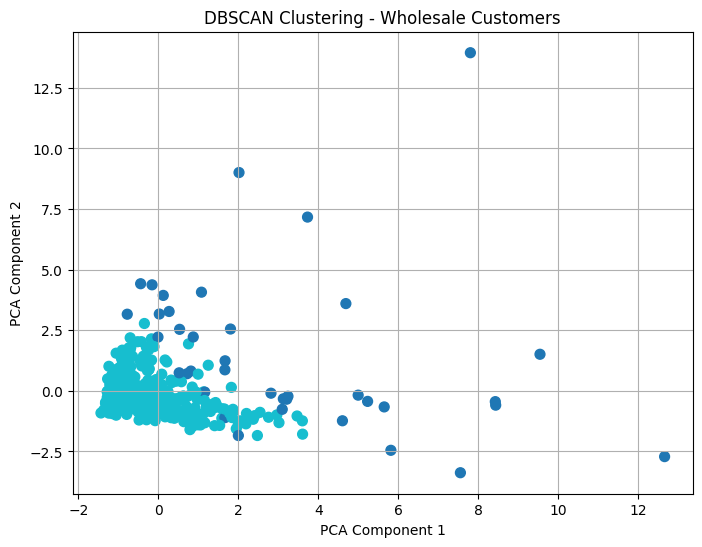

In [10]:
# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering - Wholesale Customers")
plt.grid(True)
plt.show()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_22180\4206927844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set2')


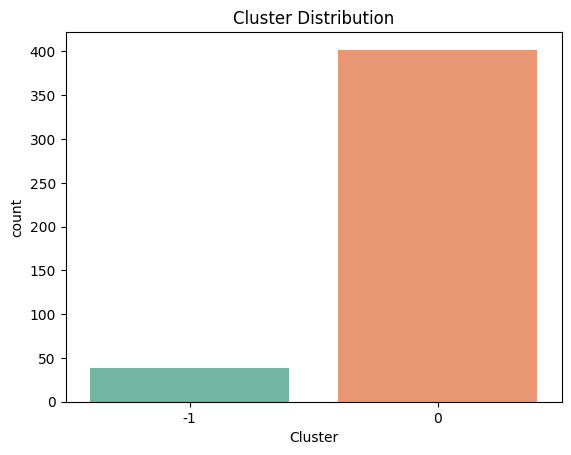

In [11]:
# Visualize cluster distribution
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title('Cluster Distribution')
plt.show()